In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
books_df = pd.read_csv('books.csv')
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [6]:
num_rows, num_columns = books_df.shape
print(f"Q1: The dataset has {num_rows} rows and {num_columns} columns.")

Q1: The dataset has 399 rows and 24 columns.


In [7]:
books_without_original_title = books_df['original_title'].isnull().sum()
print(f"Q2: There are {books_without_original_title} books without an original title.")

Q2: There are 36 books without an original title.


In [8]:
unique_books = books_df['book_id'].nunique()
print(f"Q3: There are {unique_books} unique books in the dataset after removing null values in the original_title column.")

Q3: There are 399 unique books in the dataset after removing null values in the original_title column.


In [9]:
average_rating = books_df['average_rating'].mean()
print(f"Q4: The average rating of all the books is {average_rating:.2f}.")

Q4: The average rating of all the books is 3.98.


In [10]:
books_published_in_2000 = books_df[books_df['original_publication_year'] == 2000].shape[0]
print(f"Q5: The number of books published in the year 2000 is {books_published_in_2000}.")

Q5: The number of books published in the year 2000 is 8.


In [11]:
max_ratings_book_title = books_df.loc[books_df['work_ratings_count'].idxmax(), 'title']
print(f"Q6: The book with the maximum number of ratings is '{max_ratings_book_title}'.")

Q6: The book with the maximum number of ratings is 'The Diary of a Young Girl'.


In [12]:
rating_buckets = np.arange(0, 5.5, 0.5)
books_df['rating_bucket'] = pd.cut(books_df['average_rating'], bins=rating_buckets, include_lowest=True)
bucket_counts = books_df['rating_bucket'].value_counts().sort_index()

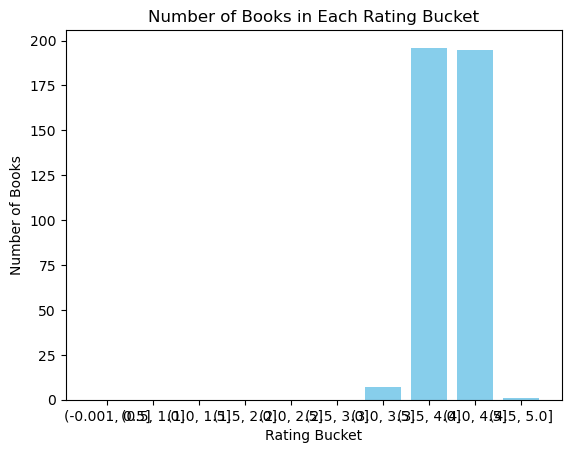

In [13]:
plt.
plt.bar(bucket_counts.index.astype(str), bucket_counts.values, color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()